In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

In [18]:
cwd = '../content/drive/MyDrive/Projects/Traffic Sign Classification/Traffic Sign Dataset/'
os.listdir(cwd)

['Meta.csv',
 'Test.csv',
 'Train.csv',
 'Meta',
 'Test',
 'Train',
 '.ipynb_checkpoints']

In [19]:
imgs_path = "/content/drive/MyDrive/Projects/Traffic Sign Classification/Traffic Sign Dataset/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")

Done


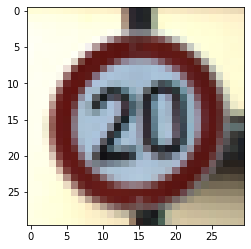

In [20]:
path = "../content/drive/MyDrive/Projects/Traffic Sign Classification/Traffic Sign Dataset/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [21]:
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.1, random_state=10)

print("training_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)
  
y_train = tf.one_hot(y_train,43)
y_test = tf.one_hot(y_test,43)

training_shape:  (35288, 30, 30, 3) (35288,)
testing_shape:  (3921, 30, 30, 3) (3921,)


In [22]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= x_train.shape[1:]))
model.add((tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation="relu")))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add((tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))) 
model.add(tf.keras.layers.BatchNormalization())
model.add((tf.keras.layers.MaxPool2D(pool_size=(2,2))))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Flatten()) 

model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.40))

model.add(tf.keras.layers.Dense(43, activation="softmax"))

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
552/552 [==============================] - 6s 9ms/step - loss: 0.6740 - accuracy: 0.8252 - val_loss: 0.0552 - val_accuracy: 0.9824
Epoch 2/5
552/552 [==============================] - 5s 9ms/step - loss: 0.1192 - accuracy: 0.9675 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 3/5
552/552 [==============================] - 5s 9ms/step - loss: 0.0985 - accuracy: 0.9744 - val_loss: 0.0615 - val_accuracy: 0.9847
Epoch 4/5
552/552 [==============================] - 5s 8ms/step - loss: 0.0805 - accuracy: 0.9783 - val_loss: 0.0386 - val_accuracy: 0.9923
Epoch 5/5
552/552 [==============================] - 4s 8ms/step - loss: 0.0851 - accuracy: 0.9804 - val_loss: 0.0453 - val_accuracy: 0.9906


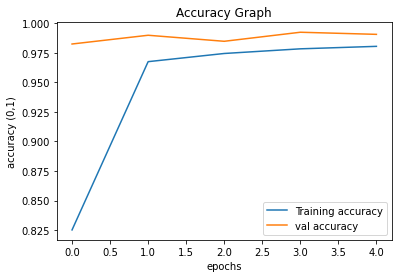

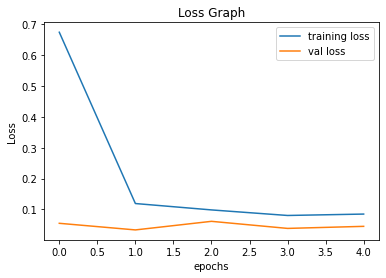

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("../content/drive/MyDrive/Projects/Traffic Sign Classification/Traffic Sign Dataset/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "../content/drive/MyDrive/Projects/Traffic Sign Classification/Traffic Sign Dataset"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

(12630, 30, 30, 3)


array([16,  1, 38, ...,  6,  7, 10])

In [32]:
predict=model.predict(test_data) 
classes=np.argmax(predict,axis=1)
print("Accuracy = ",accuracy_score(test_labels,classes))

Accuracy =  0.9524940617577197


In [33]:
model.save('/content/drive/MyDrive/Projects/Traffic Sign Classification/model/traffic_sign_classifier.h5')